In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
plt.rcParams["figure.dpi"] = 200

root_dir = 'data/'
input_5G_D2_WAVELAB_preprocessed = '5G-D2-WAVELAB-preprocessed.parquet.gzip'
input_5G_DTAG_WAVELAB_preprocessed = '5G-DTAG-WAVELAB-preprocessed.parquet.gzip'
selected_columns = ['lte.lDataClass', 'lte.lRsrp', 'lte.lNrRsrp']

In [2]:
df_D2 = pd.read_parquet(root_dir + input_5G_D2_WAVELAB_preprocessed, columns=selected_columns)
df_D2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25750092 entries, 2023-11-24 13:51:45 to 2024-11-01 12:59:48
Data columns (total 3 columns):
 #   Column          Non-Null Count     Dtype  
---  ------          --------------     -----  
 0   lte.lDataClass  25750092 non-null  string 
 1   lte.lRsrp       25747934 non-null  Float64
 2   lte.lNrRsrp     3515501 non-null   Float64
dtypes: Float64(2), string(1)
memory usage: 834.9 MB


In [3]:
df_DTAG = pd.read_parquet(root_dir + input_5G_DTAG_WAVELAB_preprocessed, columns=selected_columns)
df_DTAG.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25762417 entries, 2023-11-24 13:51:45 to 2024-11-01 12:59:27
Data columns (total 3 columns):
 #   Column          Non-Null Count     Dtype  
---  ------          --------------     -----  
 0   lte.lDataClass  25762417 non-null  string 
 1   lte.lRsrp       25748851 non-null  Float64
 2   lte.lNrRsrp     25715612 non-null  Float64
dtypes: Float64(2), string(1)
memory usage: 835.3 MB


In [4]:
df_D2.columns = df_D2.columns.str.removeprefix("lte.")
df_DTAG.columns = df_DTAG.columns.str.removeprefix("lte.")

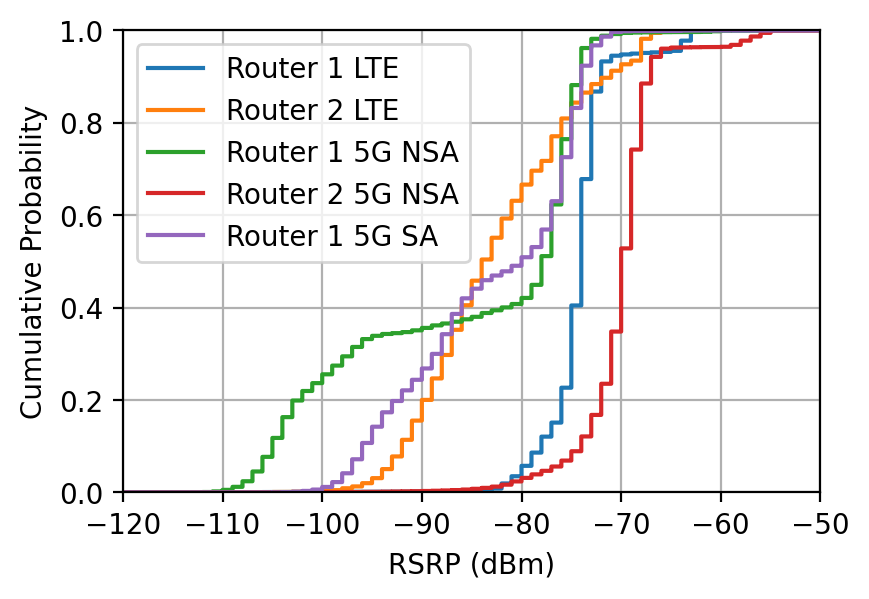

In [5]:
cdf = plt.figure(figsize=(4.5,3), dpi=200)

# Select LTE and clean up outliers
df_D2_lte = df_D2.query("lDataClass == 'LTE' & `lRsrp` > -200").dropna(subset=['lRsrp'])
df_DTAG_lte = df_DTAG.query("lDataClass == 'LTE' & `lRsrp` > -200").dropna(subset=['lRsrp'])

# Select 5G NSA and clean up outliers
df_D2_5g_nsa = df_D2.query("lDataClass == '5G NSA' & `lNrRsrp` > -200").dropna(subset=['lNrRsrp'])
df_DTAG_5g_nsa = df_DTAG.query("lDataClass == '5G NSA' & `lNrRsrp` > -200").dropna(subset=['lNrRsrp'])

# Select 5G SA and clean up outliers
df_D2_5g_sa = df_D2.query("lDataClass == '5G SA' & `lRsrp` > -200").dropna(subset=['lRsrp'])
df_DTAG_5g_sa = df_DTAG.query("lDataClass == '5G SA' & `lRsrp` > -200").dropna(subset=['lRsrp'])

plt.ecdf(df_D2_lte['lRsrp'], label='Router 1 LTE')
plt.ecdf(df_DTAG_lte['lRsrp'], label='Router 2 LTE')

plt.ecdf(df_D2_5g_nsa['lNrRsrp'], label='Router 1 5G NSA')
plt.ecdf(df_DTAG_5g_nsa['lNrRsrp'], label='Router 2 5G NSA')

plt.ecdf(df_D2_5g_sa['lRsrp'], label='Router 1 5G SA')
#plt.ecdf(df_DTAG_5g_sa['lRsrp'], label='DTAG 5G SA') # Operator 2 does not have 5G SA connectivity

plt.ylabel('Cumulative Probability')
plt.xlabel('RSRP (dBm)')
plt.xlim(-120, -50) # Valid range -140 to -44, limited to -120 to -50 for visibility
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig(f'plots/routers-ecdf-rsrp.pdf', bbox_inches='tight')
plt.show()